In [26]:
import numpy as np

npa_2 = np.reshape(np.arange(6), (2, 3))
npa_2


array([[0, 1, 2],
       [3, 4, 5]])

In [28]:
np.sum(npa_2, axis = 1)

array([ 3, 12])

In [34]:
npa_1 = np.reshape(np.arange(18), (2, 9))
npa_1

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [35]:
np.argmax(npa_1)

np.int64(17)

In [ ]:
import pandas as pd
import csv


df = pd.read_csv(
    '/content/book_info.csv',
    delimiter=';',           
    quoting=csv.QUOTE_NONE,  
    encoding='utf-8',
    on_bad_lines='skip'      
)

df.head()

,title,author,categories,pageCount,averageRating,ratingsCount,publishedDate,description
0,1876,Gore Vidal,Fiction,385.0,NaN,NaN,2018-08-22,The third volume of Gore Vidal's magnificent s...
1,"""""""...And Ladies of the Club""""""",Helen Hooven Santmyer,NaN,1433.0,NaN,NaN,1986,NaN
2,11/22/63,Stephen King,Fiction,866.0,4.0,2.0,2011-11-08,"ON NOVEMBER 22, 1963, THREE SHOTS RANG OUT IN ..."
3,2010: Odyssey Two,Arthur C. Clarke,Fiction,328.0,3.0,1.0,1982,"""""""A daring romp through the solar system and ..."
4,A Court of Mist and Fury,Sarah J. Maas,Fiction,678.0,4.5,4.0,2016-05-03,The second instalment of the GLOBAL PHENOMENON...


In [ ]:
from scipy.stats import pearsonr


data = df[['pageCount', 'ratingsCount', 'averageRating']].dropna()

pearson_corr, pearson_p = pearsonr(data['pageCount'], data['averageRating'])


print(f"Pearson correlation: {round(pearson_corr, 3)}, p-value: {round(pearson_p, 3)}")

if abs(pearson_corr) < 0.3:
    print("Very weak or no correlation.")
elif 0.3 <= pearson_corr < 0.5:
    print("Weak positive correlation.")
elif pearson_corr >= 0.5:
    print("Strong positive correlation.")
elif -0.5 < pearson_corr <= -0.3:
    print("Weak negative correlation.")
elif pearson_corr <= -0.5:
    print("Strong negative correlation.")


if pearson_p < 0.05:
    print("Correlation is statistically significant (p < 0.05).")

else:
    print("Correlation is not statistically significant (p >= 0.05).")

Pearson correlation: 0.136, p-value: 0.136
Weak or no correlation, because correlation coefficient is closer to 0.
Because p-value (significance level) is greater than 0.05, correlation is statistically insignificant.


In [ ]:
import statsmodels.api as sm


y = data['averageRating']
X = data[['pageCount', 'ratingsCount']]
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.091
Date:                Sun, 22 Jun 2025   Prob (F-statistic):              0.127
Time:                        03:33:19   Log-Likelihood:                -224.86
No. Observations:                 189   AIC:                             455.7
Df Residuals:                     186   BIC:                             465.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0536      0.114     35.610   

In [ ]:
# Рассматривая результаты OLS регрессии, обращая внимание на общие ключевые метрики модели, можно заметить следующее: R-squared = 0.022 
# показывает очень слабую предсказательную способность, лишь 2.2 % дисперсии рейтинга, Prob (F-statistic) = 0.127, что больше 0.05, 
# говорит о том что модель не является статистически значимой. Если рассматривать влияния переменных, то у pageCount p-value = 0.066, что 
# является показателем крайне низкого влияния или его отсутствия. При этом можно заметить что коэффициент регрессии равен 0.0004. Это 
# означает что с каждой лишней страницей происходит незначительный прирост у рейтинга в размере 0.0004. У переменной ratingsCount 
# отрицательный, равный -0.0002, означающий что влияние данной переменной отсутствует. Исходя из всего вышеперечисленного можно сделать 
# вывод что влияние переменной pageCount крайне слабое, в то время как влияния ratingsCount вообще не наблюдается.

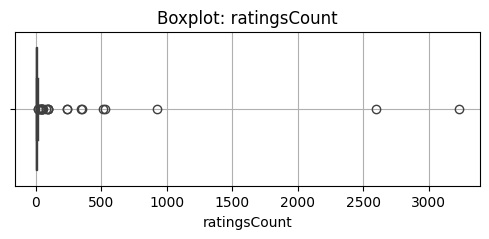

Shapiro-Wilk: statistic=0.1571, p-value=0.0000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro


ratings = data['ratingsCount']

plt.figure(figsize=(6, 2))
sns.boxplot(x=ratings)
plt.title("Boxplot: ratingsCount")
plt.grid(True)
plt.show()

shapiro_stat, shapiro_p = shapiro(ratings.sample(n=500) if len(ratings) > 500 else ratings)

print(f"Shapiro-Wilk: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


In [ ]:
# Исходя из результатов теста Shapiro-Wilk, а также boxplot-графика можно сделать следущие выводы: тест Shapiro-Wilk показал
# p-value = 0.0000, что меньше 0.05, нулевая гипотеза о нормальности распределения отвергается, что также подтверждается графиком, box и
# whiskers расположены преимущественно возле нуля, плотно сжаты, имеется большое число выбросов, распределение сильно скошено вправо,
# медиана мала, большинство книг имеет низкое количество оценок.